## Check the genrated pwoer:

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, make_smoothing_spline
import mcfit

def plot_power(savefile):
    with h5py.File(savefile, 'r') as f:
        print(f.keys())
        power = f['power'][:]
        k = f['k'][:]
        ind = np.where(np.isnan(power))[1]
        power =np.delete(power, ind, axis=1)
        k = np.delete(k, ind, axis=0)

    print(f'power shape: {power.shape}')
    for i in [0, 5]:
        fig, ax = plt.subplots()    
        #knew = np.logspace(np.log10(k[1]), np.log10(k[-1]), 100)
        #b = make_smoothing_spline(k[1:], power[i][1:])
        #pnew = b(knew)
        ax.plot(k, power[i], marker='o', label=f'bin {i}', markersize=2)
        #ax.plot(knew, pnew, label=f'bin {i} spline', markersize=2)
        ax.set_xlabel('k')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(which='both', linestyle='--', alpha=0.5)

<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>


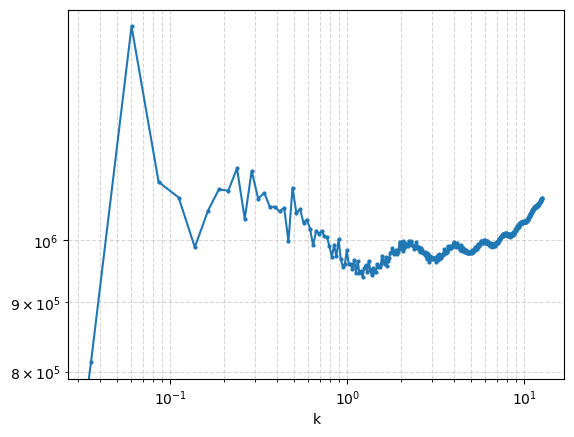

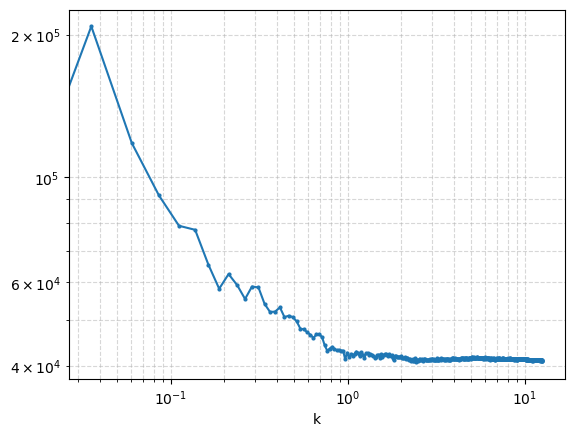

In [108]:
savefile= '/scratch/06536/qezlou/Goku/processed_data/power_bins/power_compressed_10p_Box250_Part750_0000.hdf5'
plot_power(savefile)

In [109]:

rnew, xinew =  mcfit.P2xi(knew, l=0, lowring=True)(pnew, extrap=True)


(1, 100.0)

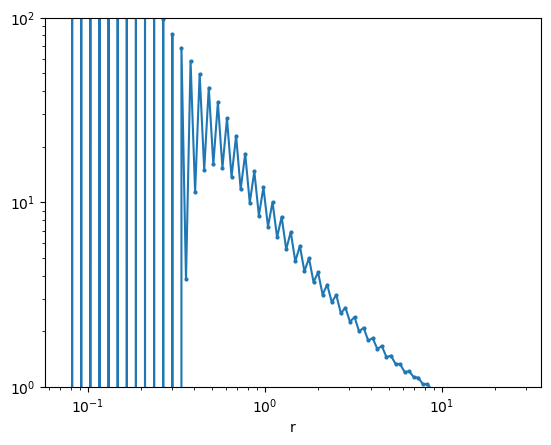

In [110]:


fig, ax = plt.subplots()

ax.plot(rnew, xinew, marker='o', label=f'bin {i}', markersize=2)
ax.set_xlabel('r')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 1e2)

<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>
power shape: (6, 1665)


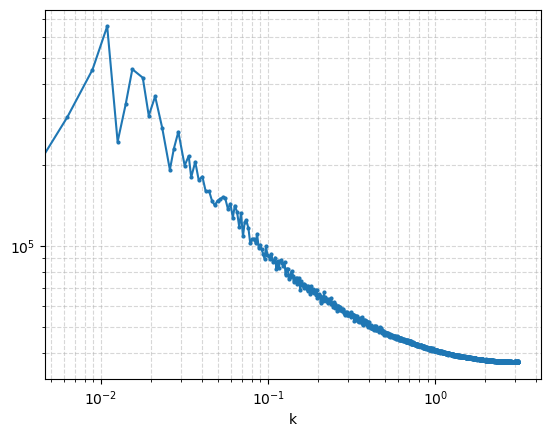

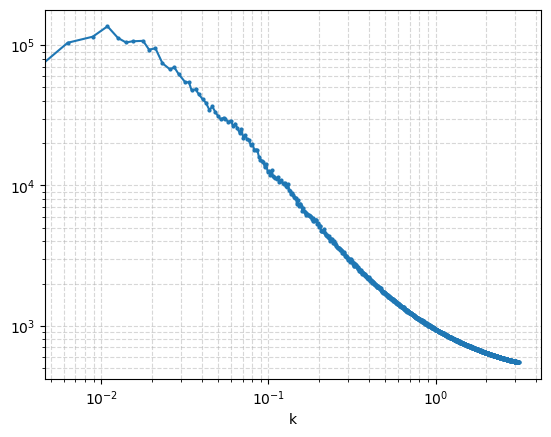

In [2]:
savefile = '/scratch/06536/qezlou/Goku/processed_data/power_bins/HF/power_compressed_10p_Box1000_Part3000_0024.hdf5'
plot_power(savefile)


In [114]:
2*np.pi/0.04, 2*np.pi/0.2

(157.07963267948966, 31.41592653589793)

In [2]:
1/3.5

0.2857142857142857

## G(k):

In [5]:
pk_file = '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0024/output/powerspectrum-0.2857.txt'
import numpy as np
import h5py 
pk = np.loadtxt(pk_file, skiprows=1)
ind = pk[:,0] < 10
km  = pk[:,0][ind]
pmm  = pk[:,1][ind]
savefile= '/scratch/06536/qezlou/Goku/processed_data/power_bins/power_compressed_10p_Box250_Part750_0000.hdf5'
with h5py.File(savefile, 'r') as f:
    print(f.keys())
    phh = f['power'][:]
    k = f['k'][:]
    ind = np.where(np.isnan(phh))[1]
    phh =np.delete(phh, ind, axis=1)
    khh = np.delete(k, ind, axis=0)
    ind = k < 10
    khh = khh[ind]
    phh = phh[6,ind]


<KeysViewHDF5 ['k', 'mbins', 'pairs', 'power', 'sim_tag']>


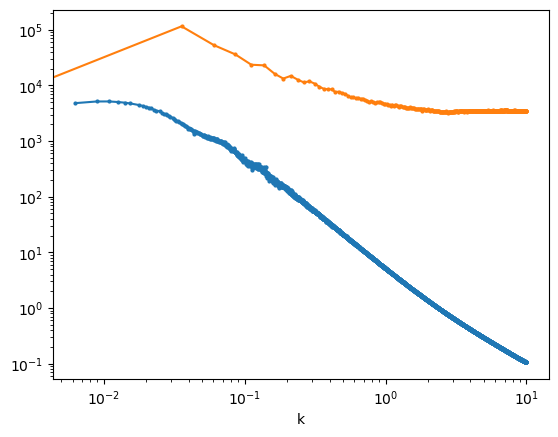

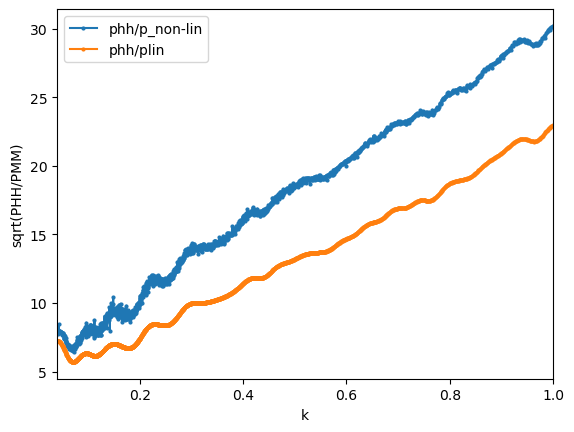

In [11]:
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
fig, ax = plt.subplots()


phh_interp = interp1d(khh, phh, kind='cubic', fill_value='extrapolate')(km)
ax.plot(km, pmm, label='Goku', marker='o', markersize=2)
ax.plot(khh, phh, label='Goku', marker='o', markersize=2)


ax.set_xlabel('k')
ax.set_xscale('log')
ax.set_yscale('log')

fig, ax = plt.subplots()
ind = (km < 1)*( km > 0.04)
ax.plot(km[ind], np.sqrt(phh_interp/pmm)[ind], label='phh/p_non-lin', marker='o', markersize=2)
ax.set_xlim(0.04, 1)
ax.set_xlabel('k')
ax.set_ylabel('sqrt(PHH/PMM)')


# Linear power at z=2.5 from Nbodykit
from nbodykit.lab import cosmology
from nbodykit.cosmology import power
cosmo = cosmology.Planck15.clone()
plin = power.linear.LinearPower(cosmo, redshift=2.5)(km)
ax.plot(km[ind], np.sqrt(phh_interp/plin)[ind], label='phh/plin', marker='o', markersize=2)

ax.legend()


## Through $P_{h, \ non-lin \ matter}$:

## Using sims's initial condition:

We need to run `mpgadgetic` on the initial power spectrum to get $\delta_{m, lin}$ and then calculate $P_{h, lin}(k)$

In [45]:
import bigfile

savedir='/scratch/06536/qezlou/Goku/FOF/L2/compressed_10p_Box250_Part750_0047/ICS/250_750_99/ICTransfers'
with bigfile.BigFile(savedir,'r') as f:
    print(f.blocks)
    print(f['DELTA_CDM'][:].shape)

['DELTA_BAR', 'DELTA_CB', 'DELTA_CDM', 'DELTA_NU', 'VEL_BAR', 'VEL_CB', 'VEL_CDM', 'VEL_NU', 'VEL_TOT', 'logk']
(587,)


In [41]:
587**(1/3)

8.372966759705923

In [ ]:
savedir='/scratch/06536/qezlou/Goku/FOF/L2/compressed_10p_Box250_Part750_0047/ICS/250_750_99/ICTransfers/DELTA_BAR'


with bigfile.BigFile(savedir) as f:
    print(f[]

AttributeError: 'BigFile' object has no attribute 'attrs'